# AdaBoost with sklearn

## Import packages

In [3]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

## Import data

In [4]:
cancer = load_breast_cancer()
# print the names of the 13 features
print("Features: ", cancer.feature_names)

# print the label type of cancer('malignant' 'benign')
print("Labels: ", cancer.target_names)

# print data(feature)shape
cancer.data.shape

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']


(569, 30)

In [5]:
# print the cancer data features (top 5 records)
print(cancer.data[0:5])

# print the cancer labels (0:malignant, 1:benign)
print(cancer.target)

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414

In [6]:
x = cancer['data']
y = cancer['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)  # 70% training and 30% test


# Objectives of the practical session
1. Comparative study of the two ensemble learning approaches : Bagging versus Boosting
2. Analysis of each hyperparameter of the AdaBoost algorithm. This way, you can wisely choose the most suitable hyperparameters for your problem in order to train the best performing AdaBoost model.

# 1. Comparing Baggin and Boosting, using decision tree models

In [12]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree

# Bagging Classifier with one model, namely a decision tree
clf = tree.DecisionTreeClassifier(random_state=42)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy_test = clf.score(x_test,y_test)
print('Accuracy =', round(accuracy_test*100,3),'%')

accuracy_train = clf.score(x_train,y_train)
print('Accuracy =', round(accuracy_train*100,3),'%')

Accuracy = 94.152 %
Accuracy = 100.0 %


In [13]:
# Bagging Classifier with several decision trees
clf = BaggingClassifier(tree.DecisionTreeClassifier(), n_estimators=300, random_state=42)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy = clf.score(x_test,y_test)
print('Accuracy =', round(accuracy*100,3),'%')


Accuracy = 95.906 %


In [14]:
# Bagging Classifier : Random Forest 
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=300, random_state=42)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy = clf.score(x_test,y_test)
print('Accuracy =', round(accuracy*100,3),'%')

Accuracy = 97.076 %


In [15]:
# Boosting approach : Adaboost
weak_learner = DecisionTreeClassifier(max_depth=1) # One level decision tree (decision stump)
model_ada_tree = AdaBoostClassifier(estimator=weak_learner)

model_ada_tree.fit(x_train, y_train)
y_pred = model_ada_tree.predict(x_test)

print('Accuracy =', round(np.mean(y_test==y_pred)*100,3),'%')

Accuracy = 97.661 %


# 2. Analysis of Adaboost parameters

### estimator

The parameter *estimator* defines which algorithm we will use in our Boosting procedure. We can use any type of algorithm with sklearn.

**Question : Compare and explain the obtained performance of the 4 classifiers used below**

In [23]:
# Two types of weak_learner : Use one decision tree with max_depth equals to 1 and then to 5

weak_learner = DecisionTreeClassifier(max_depth=1) 
model_ada_tree = AdaBoostClassifier(estimator=weak_learner)

model_ada_tree.fit(x_train, y_train)
y_pred = model_ada_tree.predict(x_test)

print('Accuracy =', round(np.mean(y_test==y_pred)*100,3),'%')

Accuracy = 97.661 %


In [24]:
# weak_learner : Use a linear SVM classifier 

weak_learner = SVC(probability=True, kernel='linear')
model_ada_rl = AdaBoostClassifier(estimator=weak_learner)

scaler = StandardScaler().fit(x_train)
x_train_scale = scaler.transform(x_train)
model_ada_rl.fit(x_train_scale, y_train)
x_test_scale = scaler.transform(x_test)
y_pred = model_ada_rl.predict(x_test_scale)

print('Accuracy =', round(np.mean(y_test==y_pred)*100,3),'%')

Accuracy = 95.906 %


In [25]:
# weak_learner : Use a Logistic Regression

weak_learner = LogisticRegression()
model_ada_rl = AdaBoostClassifier(estimator=weak_learner)

scaler = StandardScaler().fit(x_train)

x_train_scale = scaler.transform(x_train)
model_ada_rl.fit(x_train_scale, y_train)

x_test_scale = scaler.transform(x_test)
y_pred = model_ada_rl.predict(x_test_scale)

print('Accuracy =', round(np.mean(y_test==y_pred)*100,3),'%')

Accuracy = 98.246 %


### n_estimators

The parameter *n_estimators* defines the number of models (estimators) used for the ensemble design.
**Question : Study the impact of the number of used models in the ensemble approach**

In [44]:
# Try with n_estimators equals to 1, 5, 10, 20, and 100 
weak_learner = DecisionTreeClassifier(max_depth=1)
model_ada_tree = AdaBoostClassifier(estimator=weak_learner, n_estimators=100)

model_ada_tree.fit(x_train, y_train)
y_pred = model_ada_tree.predict(x_test)

print('Accuracy =', round(np.mean(y_test==y_pred)*100,3),'%')

Accuracy = 98.246 %


### learning_rate

Controls the rate or the speed at which the weights change per iteration. Weight applied to each classifier at each boosting iteration. A higher learning rate increases the contribution of each classifier

**Question : Study the relathionship between n_estimators ad learning_rate**

**Case 1 : n_estimators=100, learning_rate = 0.5 and then 1**

**Case 2 : learning_rate=0.5, n_estimators= 50 and then 500**


In [50]:
weak_learner = DecisionTreeClassifier(max_depth=1)
model_ada_tree = AdaBoostClassifier(estimator=weak_learner, n_estimators=500, learning_rate=0.5)

model_ada_tree.fit(x_train, y_train)
y_pred = model_ada_tree.predict(x_test)

print('Accuracy =', round(np.mean(y_test==y_pred)*100,3),'%')

Accuracy = 98.246 %


## The attributes

We can obtain different information on the trained model as follows

### base_estimator_

To have access to the base_estimator chosen: 

In [61]:
model_ada_tree.estimator_

DecisionTreeClassifier(max_depth=1)

### classes_

To know the type of classes used :

In [29]:
model_ada_tree.classes_

array([0, 1])

### n_classes_

To know the number of classes of the model:

In [30]:
model_ada_tree.n_classes_

2

### estimator_weights_

To know the weight (the contribution) of each estimator :

In [59]:
weak_learner = DecisionTreeClassifier(max_depth=1)
#By default: algorithm=SAMME.R : a variant that works with classifiers that can output prediction probabilities.
model_ada_tree = AdaBoostClassifier(estimator=weak_learner, n_estimators=200, algorithm="SAMME", learning_rate=1,random_state=42)

model_ada_tree.fit(x_train, y_train)
y_pred = model_ada_tree.predict(x_test)

print('Accuracy =', round(np.mean(y_test==y_pred)*100,3),'%')

wj=model_ada_tree.estimator_weights_
print('Weights =', wj)

Accuracy = 98.246 %
Weights = [2.50688556 1.68777373 1.61072606 1.15990079 1.14323793 0.75608112
 0.82393202 1.29946982 0.70549887 1.07903173 0.97252606 1.18752488
 0.94317195 0.9222926  0.55825611 1.17205245 0.68871055 0.41277113
 0.89261103 0.85868091 0.73511504 0.98656419 0.89183024 0.76549329
 0.70095042 0.83110161 0.69018368 0.83843714 0.78698347 0.83687038
 0.87871699 0.69031721 0.77295152 0.83453389 0.44880541 0.6077973
 0.86512112 0.56673033 0.60847013 0.85142084 0.40621465 0.57315283
 0.52565732 0.7333016  0.86762811 0.46982179 0.63215056 0.71088731
 0.71293465 0.77420283 0.44929433 0.919956   0.62184872 0.49141706
 0.88776188 0.68991062 0.52907368 0.93530308 0.85227414 0.52275226
 0.98972011 0.67168443 0.64069475 0.37115374 0.50643274 0.71380438
 0.52174477 0.58968296 0.63197269 0.60892523 0.53823681 0.6597374
 0.72815692 0.57727752 0.6584436  0.58152721 0.797151   0.73454081
 0.67603986 0.78855182 0.57134206 0.83498704 0.608839   0.62501566
 0.71129318 0.69357957 0.62230687 

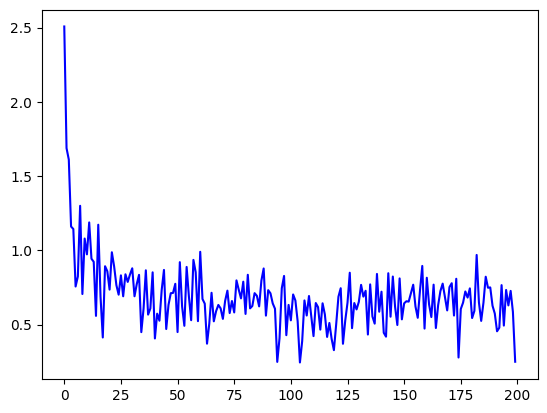

In [57]:
import matplotlib.pyplot as plt
plt.plot(wj,'b-')
plt.show()

### estimator_errors_

This attributes indicates the performance of each estimator.

98.24561403508771
Errors =  [0.07537688 0.15606884 0.16648783 0.23868531 0.24172637 0.3194977
 0.30492964 0.21425426 0.33059419 0.2536893  0.27437729 0.2337019
 0.28026007 0.28449099 0.36395106 0.2364842  0.33431998 0.39824784
 0.2905713  0.29761502 0.32407327 0.27159125 0.29073227 0.3174548
 0.33160154 0.30341219 0.33399221 0.30186404 0.31281674 0.30219433
 0.29344372 0.33396251 0.31584098 0.30268726 0.38964483 0.35256183
 0.29627051 0.36199162 0.35240826 0.29913489 0.39982012 0.36050964
 0.37153032 0.32447063 0.29574808 0.38465843 0.34702306 0.32940281
 0.32895072 0.31557065 0.38952856 0.28496686 0.34936111 0.3795598
 0.29157191 0.33405296 0.37073296 0.28185007 0.29895602 0.37220889
 0.27096736 0.33811977 0.34508951 0.40826227 0.37603015 0.32875876
 0.37244434 0.3567076  0.34706337 0.35230441 0.36859784 0.3407986
 0.32559931 0.35955928 0.34108932 0.35858126 0.31063528 0.32419907
 0.33714574 0.31247971 0.36092721 0.30259162 0.35232408 0.34864158
 0.32931316 0.33323725 0.34925697 0.310

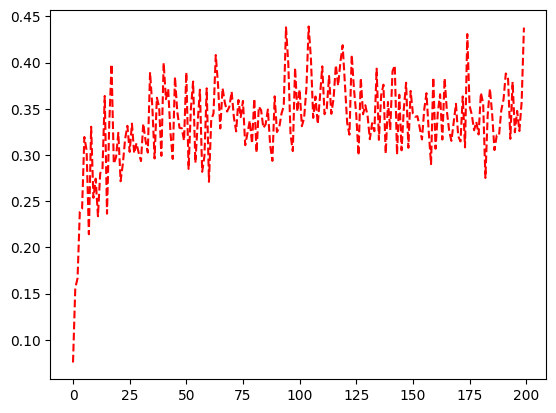

In [63]:
weak_learner = DecisionTreeClassifier(max_depth=1)
model_ada_tree = AdaBoostClassifier(estimator=weak_learner, n_estimators=200, algorithm="SAMME", learning_rate=1,random_state=42)

model_ada_tree.fit(x_train, y_train)
y_pred = model_ada_tree.predict(x_test)

print(np.mean(y_test==y_pred)*100)
e=model_ada_tree.estimator_errors_
print('Errors = ', e)
plt.plot(e,'r--')
plt.show()

### Hyperparameter tuning

In [34]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 150,200],
    'learning_rate': [0.01, 0.1, 1.0],
    'estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)],
}

# Initialize AdaBoost classifier
ada_classifier = AdaBoostClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(ada_classifier, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", round(grid_search.best_score_*100,2),'%')


Best Parameters: {'estimator': DecisionTreeClassifier(max_depth=1), 'learning_rate': 1.0, 'n_estimators': 150}
Best Score: 96.48 %


### feature_importances_

In [64]:
print('feature importance =', model_ada_tree.feature_importances_)

feature importance = [0.         0.08262059 0.         0.0091785  0.0246306  0.04289937
 0.01536384 0.07425291 0.03133921 0.0140283  0.04403871 0.
 0.01668405 0.03681484 0.03497389 0.05784397 0.02614038 0.02415414
 0.01613162 0.03821912 0.00796244 0.06341943 0.01166152 0.08265423
 0.05824833 0.00502925 0.04963193 0.07231094 0.05976788 0.        ]


In [36]:
pd.DataFrame([model_ada_tree.feature_importances_], columns=cancer['feature_names'])

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.0,0.082621,0.0,0.009178,0.024631,0.042899,0.015364,0.074253,0.031339,0.014028,...,0.007962,0.063419,0.011662,0.082654,0.058248,0.005029,0.049632,0.072311,0.059768,0.0
